In [1]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Step 1: Load and Inspect the Data

First, let's load the dataset and inspect the first few rows to understand its structure.

In [2]:
#load dataset
df = pd.read_csv("../data/raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df.shape

(1407328, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

From the above we can see that there is no missing value in each attrbutes. 

In [7]:
df.head(15)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


Step 2: Perform Descriptive Statistics

2.1. Basic Statistics for Textual Lengths

Calculate the length of each headline to get an idea of the distribution.

In [8]:
# Calculate headline length
df['headline_length'] = df['headline'].apply(len)

# Basic statistics for headline length
headline_length_stats = df['headline_length'].describe()
print(headline_length_stats)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In the dataset used in this project, the average length of a headline is about 7.3 characters.
The shortest headline is 3 characters, while the longest is 5.12 characters.

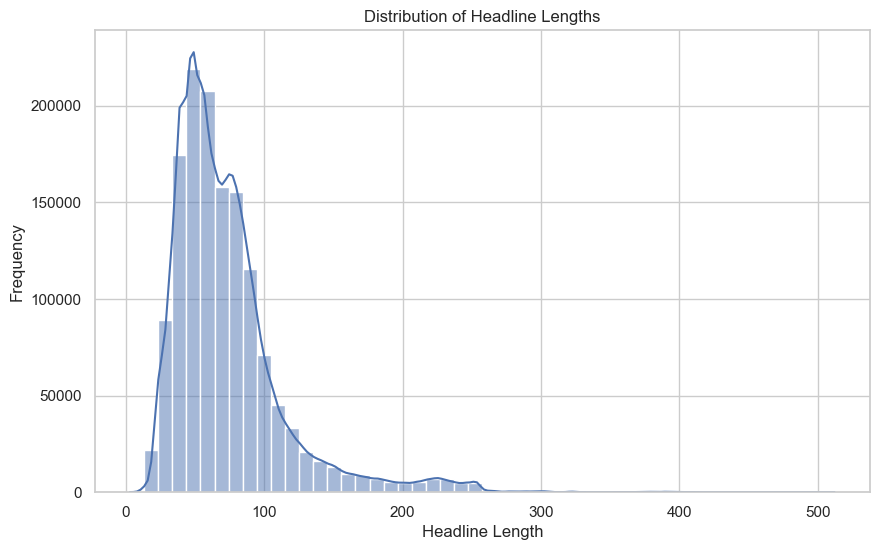

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


2.2. Count Articles per Publisher

Identify which publishers are the most active by counting the number of articles they have published.

C:\Users\getac\AppData\Local\Temp\ipykernel_8384\465350416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")


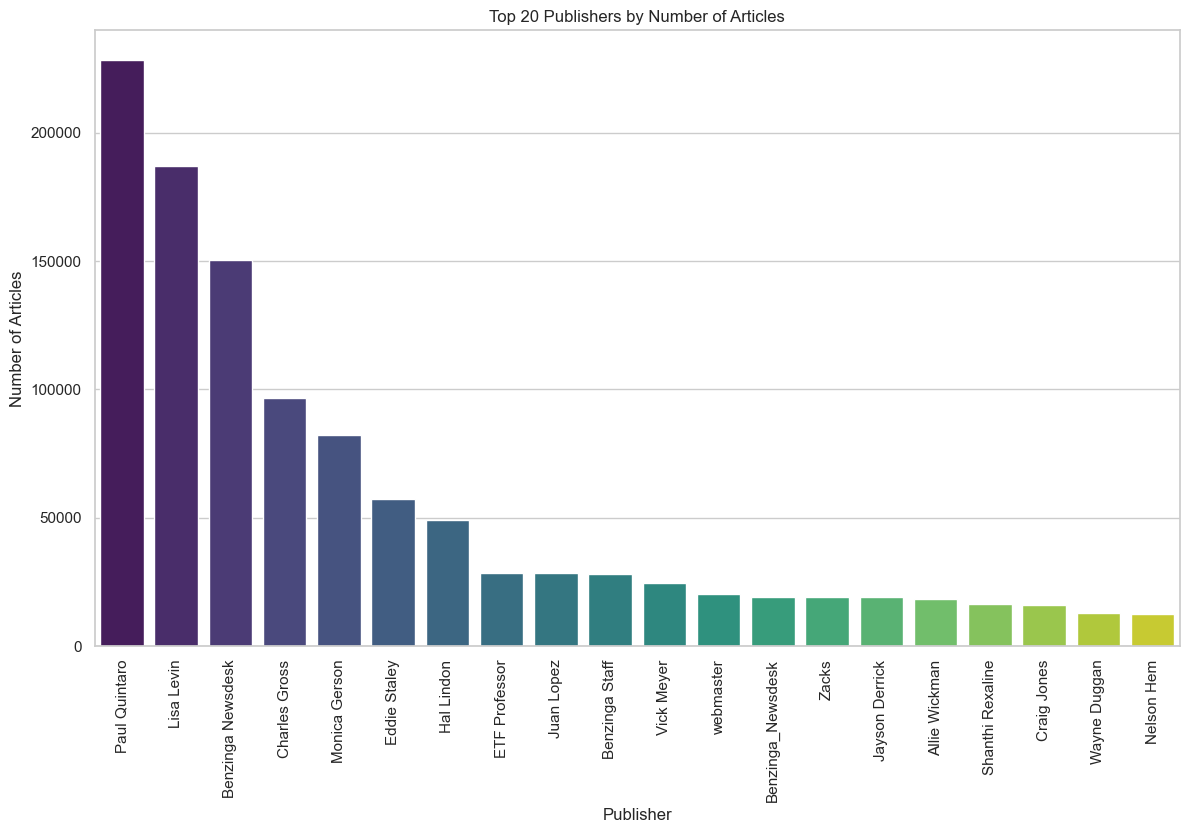

In [10]:
# Top 20 publishers by article count
top_publishers = df['publisher'].value_counts().head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Top 20 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()


In [11]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)


publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


The Paul Quintaro, Lisa Levin, and Benzinga Newsdesk  are the top three publisher are the most active article publishers while the Shazir Mucklai, Laura Jennings, Eric Martin, ose Rodrigo, Jeremie Capron are not active article publisher because they are only participated on each publishing a single article.

2.3. Analyze Publication Dates

Examine the publication dates to identify trends over time.

In [12]:
# Check the length of the date strings
df['date_length'] = df['date'].apply(len)
print(df['date_length'].value_counts())


date_length
19    1351341
25      55987
Name: count, dtype: int64


In [13]:
# Truncate the 'date' column to a length of 20 characters
df['date'] = df['date'].str.slice(0, 19)

# Display the first 15 rows
df.head(15)


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,date_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,39,25
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,42,25
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,29,25
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,44,25
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,87,25
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25,A,71,25
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20,A,73,25
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04,A,120,25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59,A,84,25
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17,A,42,25


In [14]:
print(df['date'].head(20))

0     2020-06-05 10:30:54
1     2020-06-03 10:45:20
2     2020-05-26 04:30:07
3     2020-05-22 12:45:06
4     2020-05-22 11:38:59
5     2020-05-22 11:23:25
6     2020-05-22 09:36:20
7     2020-05-22 09:07:04
8     2020-05-22 08:37:59
9     2020-05-22 08:06:17
10    2020-05-22 00:00:00
11    2020-05-22 00:00:00
12    2020-05-21 00:00:00
13    2020-05-21 00:00:00
14    2020-05-21 00:00:00
15    2020-05-21 00:00:00
16    2020-05-18 00:00:00
17    2020-05-16 00:00:00
18    2020-05-15 00:00:00
19    2020-05-08 00:00:00
Name: date, dtype: object


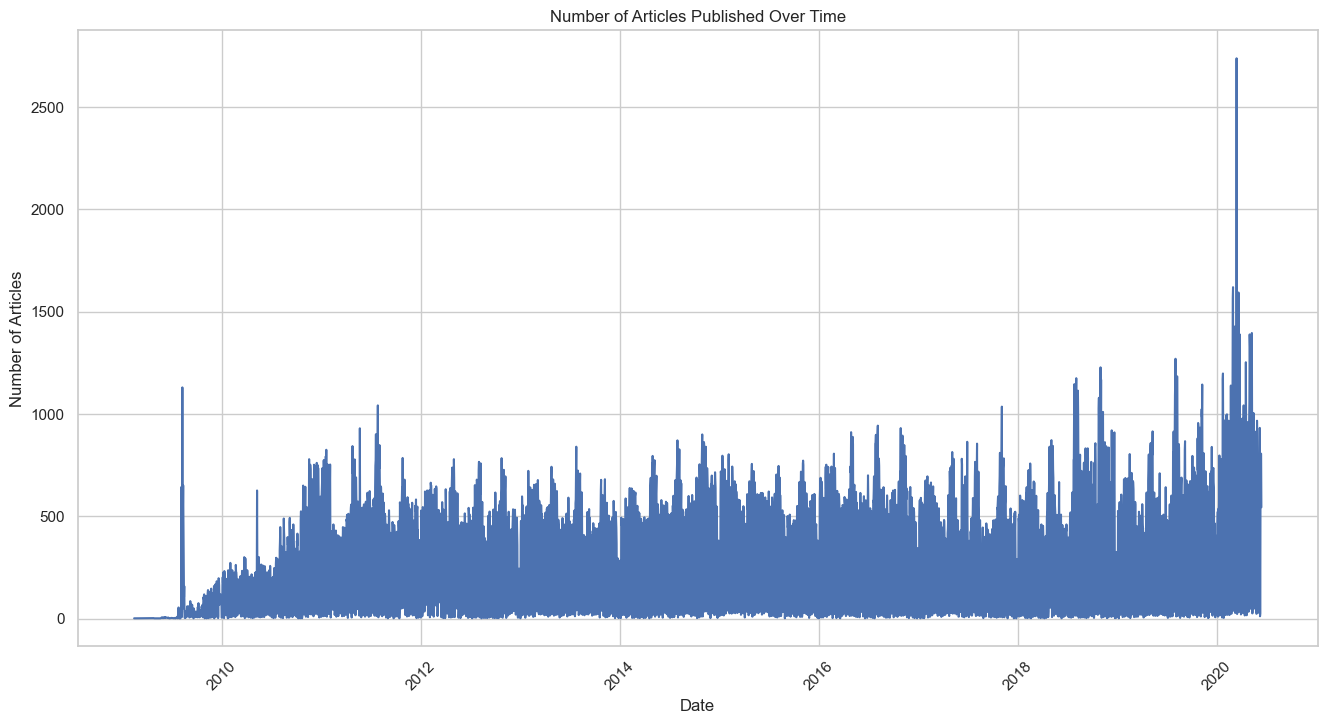

In [15]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the date and hour for analysis
df['date_only'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour

# Count articles by date
date_counts = df['date_only'].value_counts().sort_index()

# Plotting the number of articles over time
plt.figure(figsize=(16, 8))
sns.lineplot(x=date_counts.index, y=date_counts.values)
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

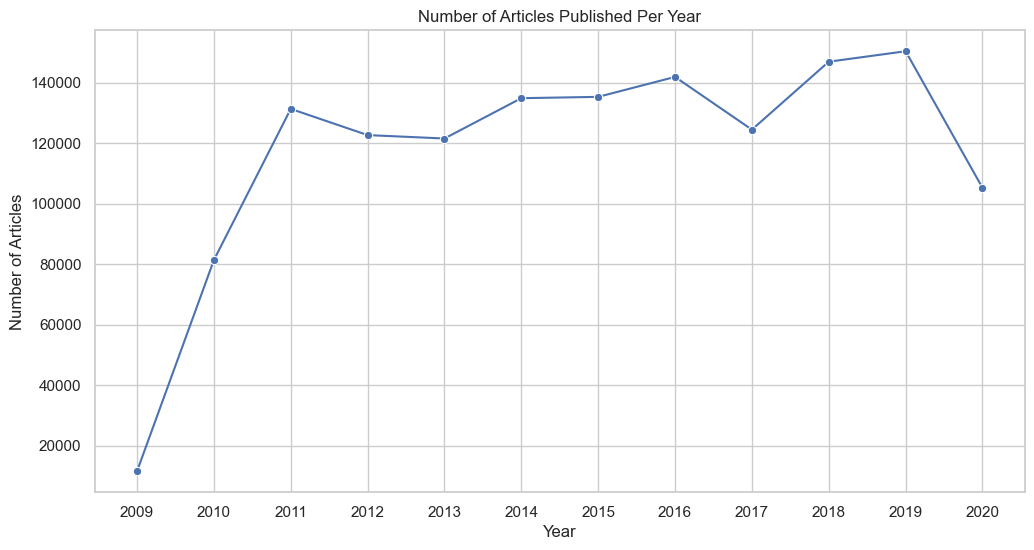

In [16]:
# Extract the year from the date
df['year'] = df['date'].dt.year

# Count the number of articles per year
articles_per_year = df['year'].value_counts().sort_index()

# Plotting the number of articles per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=articles_per_year.index, y=articles_per_year.values, marker='o')
plt.title('Number of Articles Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(articles_per_year.index)  # Ensure all years are shown on the x-axis
plt.grid(True)
plt.show()

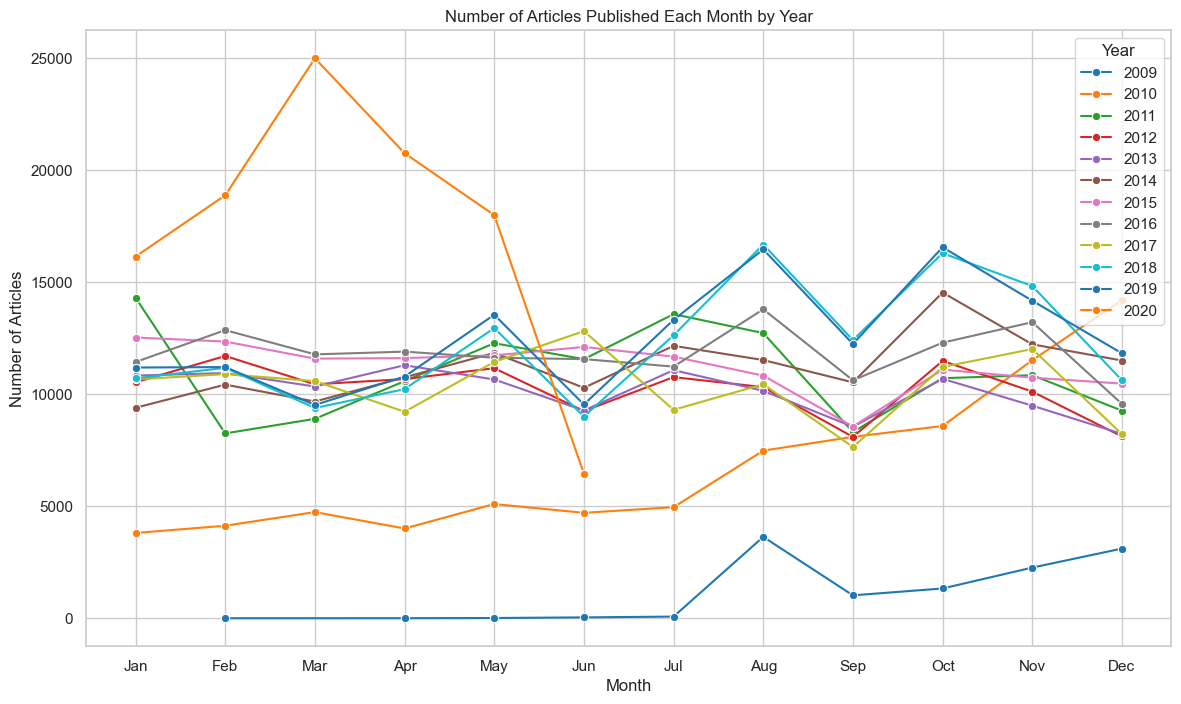

In [17]:
#Extract year and month from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Count the number of articles per year and month
articles_per_month = df.groupby(['year', 'month']).size().reset_index(name='count')

# Plotting the number of articles per month for each year
plt.figure(figsize=(14, 8))
sns.lineplot(data=articles_per_month, x='month', y='count', hue='year', marker='o', palette='tab10')
plt.title('Number of Articles Published Each Month by Year')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

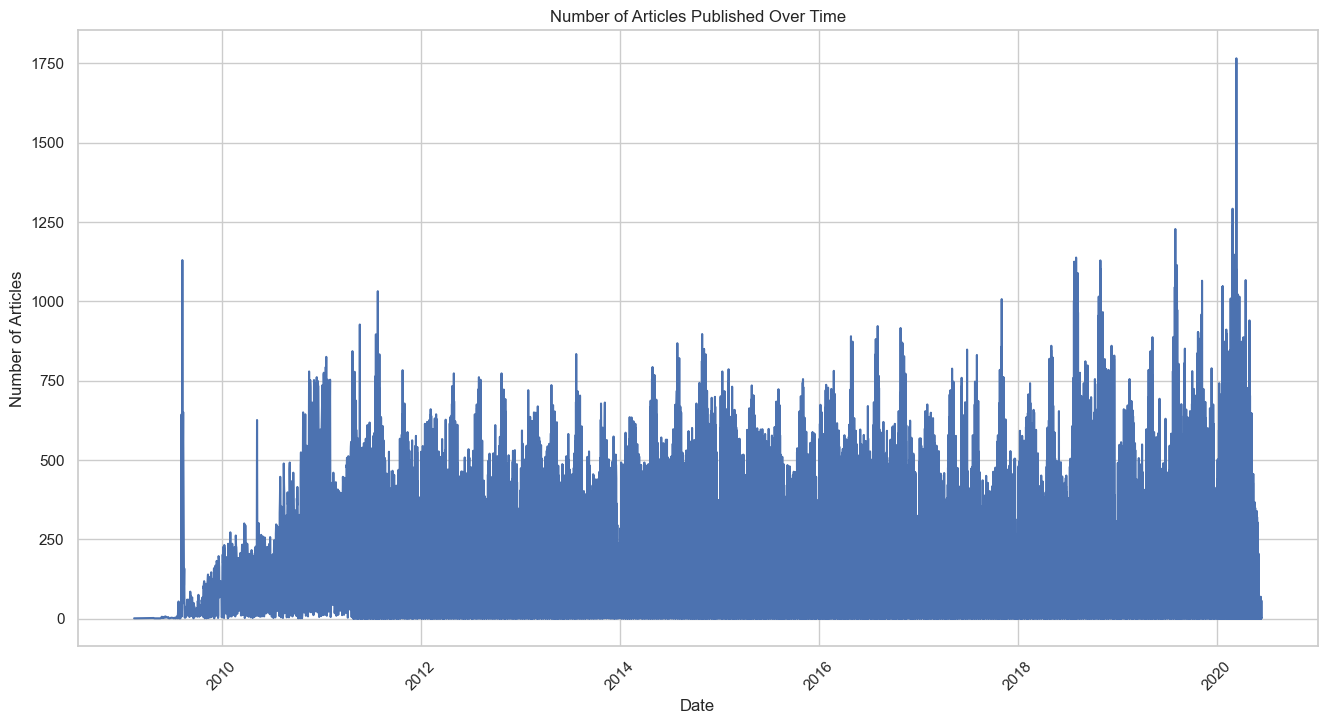

In [18]:
# Count the number of articles per date
articles_per_date = df['date'].value_counts().sort_index()

# Convert to DataFrame for plotting
articles_per_date_df = articles_per_date.reset_index()
articles_per_date_df.columns = ['date', 'count']

# Plotting the number of articles over time
plt.figure(figsize=(16, 8))
sns.lineplot(data=articles_per_date_df, x='date', y='count')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

The output will be a line graph that visually represents the number of articles published over time.In the date 2020-06-08, 2020-06-09, 2020-06-10, 2020-06-11 are the highest article published, indicating higher activity on that day. This allows you to identify trends, such as periods of increased or decreased publication activity, which could correlate with specific market events or news cycles. 

Step 3: Text Analysis

3.1. Sentiment Analysis

Perform sentiment analysis on the headlines to gauge the sentiment.